### **Introduction:**

**IRIS FLOWER CLASSIFICATION:**
Iris flower classification is the task of categorizing iris flowers into different species based on their characteristics.

The objective of Iris flower classification is to develop a model that can accurately categorize iris flowers into their respective species based on specific features.

The most common iris species are:

Iris setosa

Iris versicolor

Iris virginica

### **Import the Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split



### **Read the data :**

In [ ]:
df_iris=pd.read_csv("/content/Iris.csv")

In [ ]:
df_iris.shape   # displays the shape of the data

(150, 6)

In [ ]:
df_iris.columns # displays the columns names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df_iris.info()   # displays information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Observations :**   **The dataset contain the following attributes:**

Sepel legth in cm,
Sepal width in cm,
Petal length in cm,
Petal width in cm.

In [ ]:
df_iris.head()    # by default it displays top 5 records

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris.tail()   # by default it displays bottom 5 records

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df_iris.drop('Id',axis=1,inplace =True)

In [ ]:
df_iris.describe()   # displays the statistical information

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations:**From above ,the mean and median of each feature is  almost same, means it clearly tells that there is normal distribution .

In [ ]:
df_iris.skew()  # displays the skew ness of all the continuous variables

<ipython-input-12-360088177682>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_iris.skew()


SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

Skew() tell us whether the data is distributed normally or not?

 **Observations:**

- PetalLengthCm, we can clearly see the skewness.
- In practical scenario, we never get zero skew.
- Zero skew means, mean= median = mode.

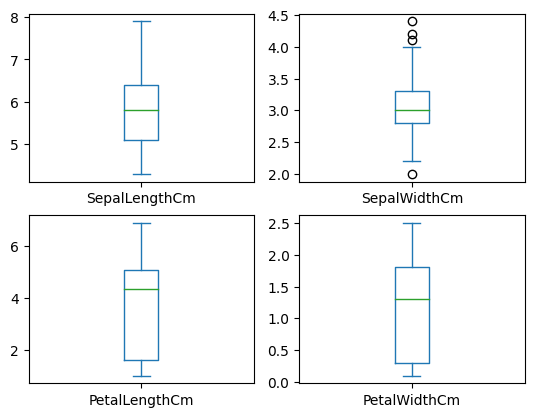

In [ ]:
df_iris.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)  # sharex gives individual axis to plots.
plt.show()

**Observations:**  Here sepalwidthcm have some outliers, the values of peatallengthcm and peatalwidthcm are mostly below 4.

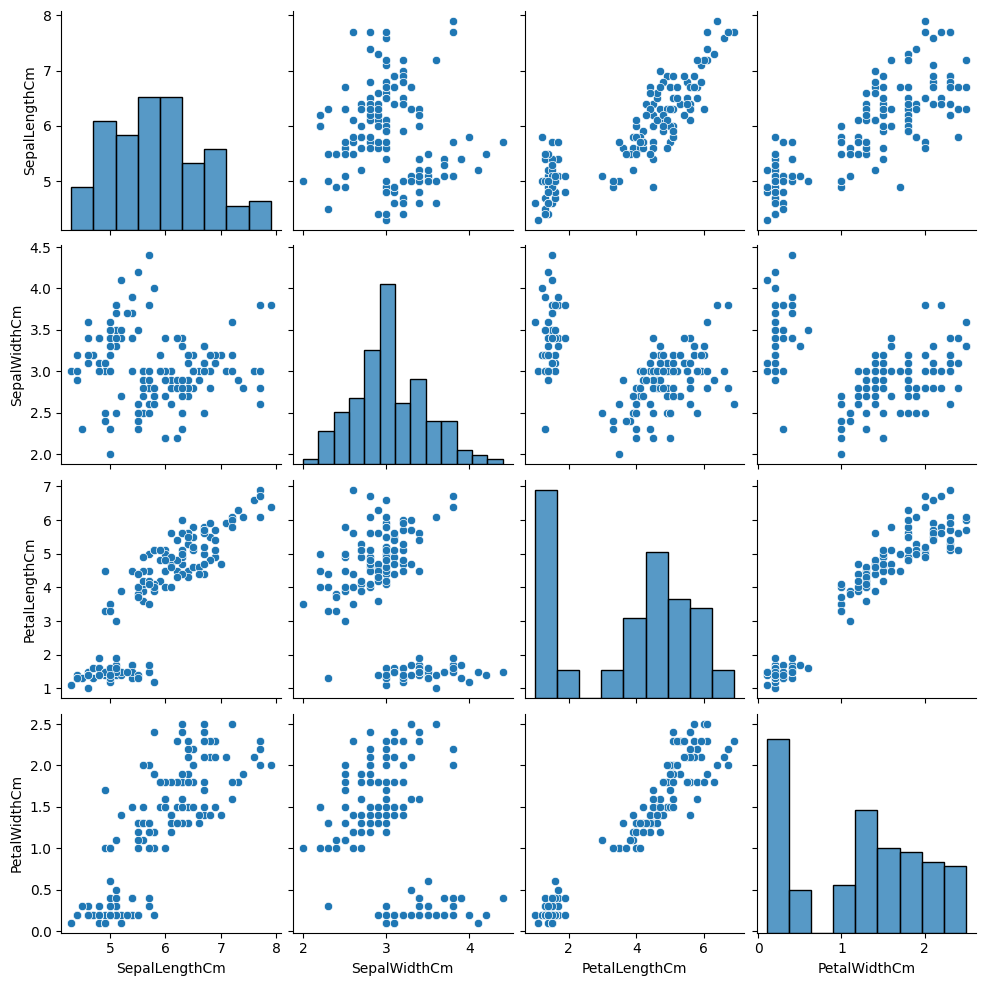

In [ ]:
sns.pairplot(df_iris)

**Observations:** The diagonal graphs whose shown in hist are have perfect co-relation. sepalwidthcm and sepallengthcm have no relation , we can't say that sepalwidth increases while sepallength increases. There is a  relation between Petallength and petalwidth,  if Petallength increases automatically petalwidth increases.if u draw a slant line all the points are near to that line .

In [ ]:
df_iris.corr()

<ipython-input-15-ac4708235dc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**Observations:** Some have positive values and some are neagative values ,means some shows positive skew pulling towards right, some may have negative skewness means pulling towards left.

<ipython-input-3-b0253d4c8bca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(),annot=True)


<Axes: >

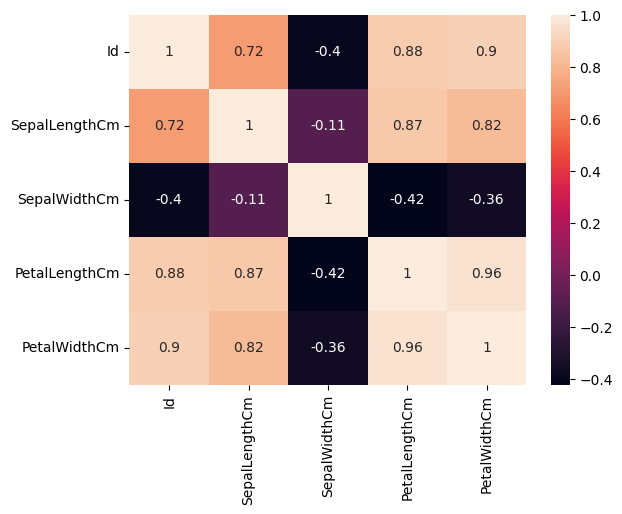

In [ ]:
sns.heatmap(df_iris.corr(),annot=True)

### **Uni-variate Analysis**

In [ ]:
df_iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: >

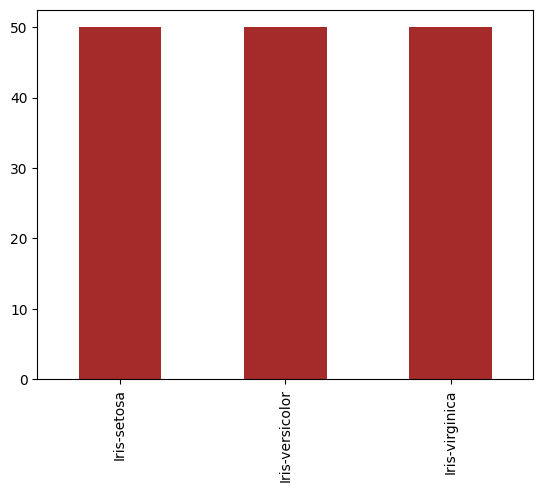

In [ ]:
df_iris['Species'].value_counts().plot(kind='bar',color='brown')

### **Logistic Regression:**  
Here we are going to work with 'species' feature. Logistic is used for solving classification problems. Doing classification of

Iris-setosa      
Iris-versicolor    
Iris-virginica     

In [ ]:
le=LabelEncoder()   # To give label to species(categorical variable)

In [ ]:
df_iris['Species']=le.fit_transform(df_iris['Species'])  # inverse_transform used to get back to original form

In [ ]:
df_iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
x=df_iris.iloc[:,0:4]   # divide data into x and y(: means all the rows,0:4 means 0 to 3 columns)
y=df_iris['Species']

In [ ]:
x.head()   # values of x-axis

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape   # here y treated as series bcoz it has one categorical variable

(150,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('No of rows in x train data:', x_train.shape)
print('No of rows in x test data:', x_test.shape)
print('No of rows in y train data:', y_train.shape)
print('No of rows in y test data:', y_test.shape)

**Applying Logistic Regression:**

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

 **Predicting y train prediction value**

In [ ]:
y__train_pred=lr.predict(x_train)

In [ ]:
y__train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_train

In [ ]:
y_test_pred = lr.predict(x_test)

In [ ]:
y_test_pred

In [ ]:
y_test

### **Find the Accuracy:**

In [ ]:
def model_eval(actual,predicted):
  cm = confusion_matrix(actual, predicted)
  acc_score = accuracy_score(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is :', acc_score)
  print(cm)
  print(clas_rep)

In [ ]:
model_eval(y_train,y_train_pred)

**Finding Accuracry for test data**

In [ ]:
model_eval(y_test,y_test_pred)